人脸数据集实战

In [21]:
#导入包
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt 
import numpy as np 



In [22]:
#导入数据，探索数据
faces = fetch_lfw_people(min_faces_per_person=60)
faces.images.shape   #(1348, 62, 47) 1348张图片，每张图片62*47
faces.data.shape    #(1348, 2914) 后两维进行了合并，共2914个特征（像素点）

(1348, 2914)

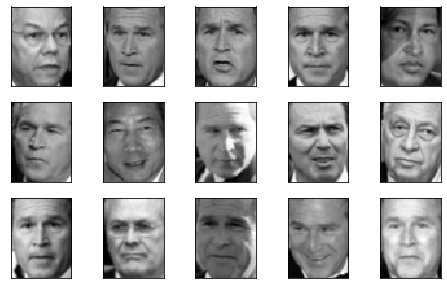

In [23]:
#可视化图片
fig, axes = plt.subplots(3, 5, figsize=(8,5), subplot_kw={"xticks":[], "yticks":[]})#不限时坐标轴

for i, ax in enumerate(axes.flat):  #或直接使用faces.images[i]
    ax.imshow(faces.images[i, :, :], cmap='gray')


In [24]:
#PCA降维处理
pca = PCA(150).fit(faces.data)  # 降到150维
V = pca.components_   # 这就是那组基
V.shape           #（150,2914） 每一行是一个基，用这个乘上我们样本X，就会得到降维后的结果矩阵

(150, 2914)

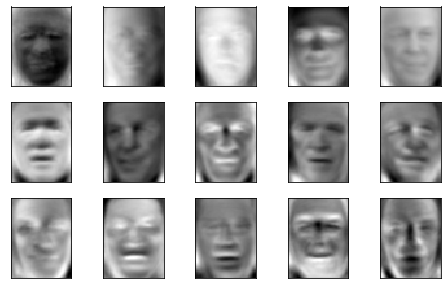

In [25]:
# 下面可视化一下V
fig, axes = plt.subplots(3, 5, figsize=(8,5), subplot_kw={"xticks":[], "yticks":[]})
#figsize -> figure的宽高
for i, ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62, 47), cmap='gray')

比起降维前的数据，新特征空间可视化后的人脸非常模糊，这是因为原始数据还没有被映射到特征空间中。但是可以看出，整体比较亮的图片，获取的信息较多，整体比较暗的图片，却只能看见黑漆漆的一块。在比较亮的图片中，眼睛，鼻子，嘴巴，都相对清晰，脸的轮廓，头发之类的比较模糊。

新特征空间里的特征向量们，大部分是"五官"和"亮度"相关的向量，所以新特征向量上的信息肯定大部分是由原数据中和"五官"和"亮度"相关的特征中提取出来的。到这里，我们通过可视化新特征空间V，解释了一部分降维后的特征：虽然显示出来的数字看着不知所云，但画出来的图表示，这些特征是和”五官“以及”亮度“有关的。这也再次证明了，PCA能够将原始数据集中重要的数据进行聚集


pca.inverse_transform， 这个可以实现降维的逆转

In [26]:
# 我们先得到降维后的数据
X_dr = pca.transform(faces.data)    # 这个是1348,150的数据

#然后我们调用接口逆转
X_inverse = pca.inverse_transform(X_dr)
X_inverse.shape    # （1348， 2914） 看这个形状还真回去了啊

(1348, 2914)

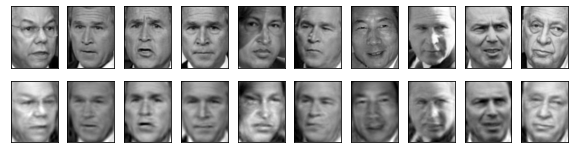

In [27]:
# 下面对比一下pca的逆转和原来图片的区别
fig, ax = plt.subplots(2, 10, figsize=(10,2.5), subplot_kw={"xticks":[], "yticks":[]})
for i in range(10):
    ax[0,i].imshow(faces.images[i,:, :], cmap='binary_r')
    ax[1,i].imshow(X_inverse[i].reshape(62, 47), cmap="binary_r")   # 降维不是完全可逆的

得到的人脸是非常相似的，后者有点模糊.  
inverse_transform并没有实现数据的完全逆转。因为，在降维的时候，部分信息已经被舍弃了，X_face中往往不会包含原数据100%的信息，所以在逆转的时候，即便维度升高，原数据中已经被舍弃的信息也不可能再回来了.